# Robotty simulation
* Import modules
* Set up parameters
* Define functions

In [222]:
import sys,os
sys.path.append(os.getcwd()+'/../')

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import kalman

#Robot params
r = 0.05 #Wheel radius
L = 0.1  #Axis length
wheel_rate_noise_std_per_sec = 0.1 #rad per sec
TICKS_PER_WHEEL = 40
RAD_PER_TICK = 2*np.pi/TICKS_PER_WHEEL

class WheelEncoderSim:
    def __init__(self,rad_per_tick):
        self.rad_per_tick = rad_per_tick
        self.wheel_rot = 0
        self.wheel_rot_prev = 0
        
    def hasTicked(self,deltaRot):
        self.wheel_rot = self.wheel_rot + deltaRot
        if abs(self.wheel_rot-self.wheel_rot_prev) > self.rad_per_tick:
            self.wheel_rot_prev = self.wheel_rot
            return True
        return False
    
def move_diff_rob(x,h,r,L):
    theta = x[2]
    w_L   = x[3]
    w_R   = x[4]
    xp    = x + h*r*np.array([1./2.*(w_L+w_R)*np.cos(theta),
                              1./2.*(w_L+w_R)*np.sin(theta),
                              1./L*(w_R-w_L),
                              0,
                              0])
    return xp

# Run the simulation

In [223]:
# Simulation time and step length
T_end = 1
h = 0.1

# Time vector
T = np.arange(0,T_end,h)

# State initialization
x_true = np.zeros((5,len(T)))
x_true[:,0] = np.array([0,0,0,np.pi/4,np.pi/4])

# Simulated sensors
wheel_L = WheelEncoderSim(RAD_PER_TICK)
wheel_R = WheelEncoderSim(RAD_PER_TICK)

x_est = np.zeros((5,len(T)))
x_est[:,0] = np.array([0,0,0,0,0])

# Simulation
for i in range(1,len(T)):   
    # Move based on current state
    x_true[:,i] = move_diff_rob(x_true[:,i-1],h,r,L)
    
    # Update wheel rotation speed
    x_true[3,i] = x_true[3,i-1] + (random.random()-0.5)*wheel_rate_noise_std_per_sec*h
    x_true[4,i] = x_true[4,i-1] + (random.random()-0.5)*wheel_rate_noise_std_per_sec*h

    
    # Fake measurements from wheel sensors
    wheel_L_upd = wheel_L.hasTicked(x_true[3,i]*h)
    wheel_R_upd = wheel_R.hasTicked(x_true[4,i]*h)

    
    # Estimate the states
    # Predict
    # If update available
    #   update
    
    # Regulate based on measured state
    
    
    

# Plot the results

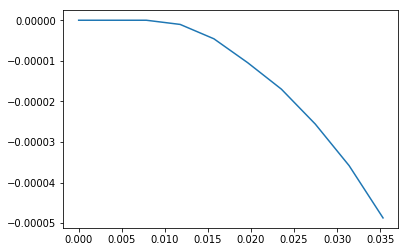

In [224]:

#figure
fig, ax = plt.subplots()
ax.plot(x_true[0,:],x_true[1,:])
plt.show()


# Data for plotting
#t = np.arange(0.0, 2.0, 0.01)
#s = 1 + np.sin(2 * np.pi * t)

#fig, ax = plt.subplots()
#ax.plot(t, s)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
#ax.grid()

#fig.savefig("test.png")
#plt.show()